<a href="https://colab.research.google.com/github/juliya754/python-physics/blob/main/lab2_gist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:96: RuntimeWarning: overflow encountered in double_scalars


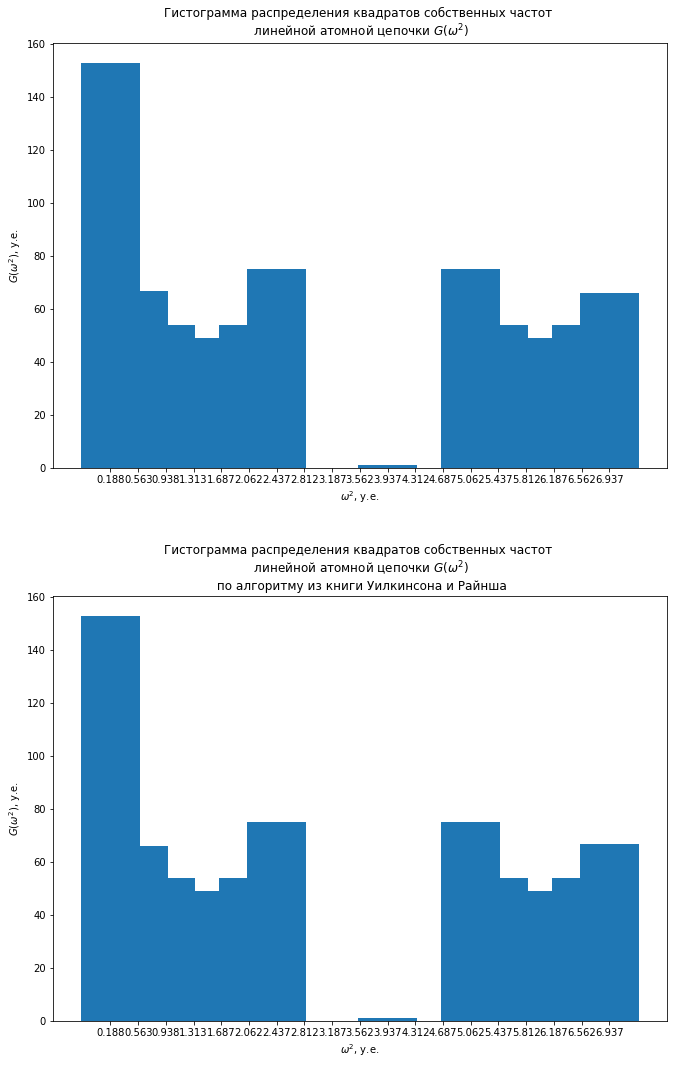

In [ ]:
"""
Задание #2. Построение гистограммы распределения квадратов собственных частот
линейной атомной цепочки с использованием алгоритма из книги Уилкинсона и Райнша.

Атомная линейная  цепочка содержит N=1000 атомов. Пронумеровать атомы от 0 до N-1
слева направо. В приближении ближайших соседей сформировать динамическую матрицу 
и рассчитать с использованием алгоритма из книги Уилкинсона и Райнша данные, 
необходимые для построения гистограммы распределения собственных значений динамической 
матрицы с постоянным шагом h без использования функций для создания гистограмм из matplotlib.pyplot.
Гистограмма должна содержать несколько десятков шагов. Численные значения параметров: $\gamma$ = 2.5,
массы атомов с нечетными номерами равны 1.0, в с четными - равны 2.0 (здесь используются условные единицы).
"""

import math
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import copy

n = 1000

# массив, содержащий массы атомов в цепочке (массы атомов с нечетными номерами равны 1.0, с четными - 2.0)
M = [1. if i%2==0 else 2. for i in range(n)]

gamma = 2.5

# функция для формирования динамической матрицы D
def calcD(n):
  D=np.zeros(n**2).reshape((n, n))
  for i in range(n):
    for j in range(n):
        if i==j:
          D[i][j] = 2*gamma
        if (i==j==0 or i==j==n):
          D[i][j] = gamma
        if (i+1==j or i-1==j):
          D[i][j] = -gamma
        D[i][j] /= math.sqrt(M[i]*M[j])
  return D

D = calcD(n)

# нахождение собственных чисел и векторов матрицы с помощью eig()
numbers, vectors = LA.eig(D)

# проверка собственных значений на неотрицательность
L = open("check_result.txt", "w")
isNegative = False
for el in numbers:
  if el < 0:
    isNegative = True
    print(e,file=L)
if isNegative:
  print("Есть отрицательные собственные значения",file=L)
else:
  print("Отрицательных собственных значений нет",file=L)
L.close()

# расчет шагов и колодцев для построения гистограммы
bins = 20
step = (np.max(numbers)-np.min(numbers))/bins
edges = [i*step+round(np.min(numbers)) for i in range(bins)]

res = 0
resArray=[]
for i in range(len(edges)-1):
  for j in numbers:
    if edges[i] <= j and edges[i+1] > j:
      res += 1
  resArray.append(res)
  res=0

edgesCentres = [i*step+step/2+np.min(numbers) for i in range(bins-1)]

# Расчет по алгоритму из книги Уилкинсона и Райнша
c = []
b = []
b.append(0)
for i in range(n):
  for j in range(n):
    if i==j:
      c.append(D[i][j])
    if i-1==j:
      b.append(D[i][j])

lambd=len(edges)
a = np.zeros(lambd)
for l in edges: 
  p = []
  p.append(1)
  p.append(c[0]-l)
  q = []
  q.append(p[0])
  q.append(p[1])
  for i in range(2,n+1):
    p.append((c[i-1]-l)*p[i-1]-b[i-1]**2*p[i-2])
    q.append(p[i]*p[i-1])

  for j in range(0,n):
      if q[j] < 0:
        a[edges.index(l)] += 1
  p=[]
  q=[]
    

tmp = copy.copy(a)
for i in range(len(a)):
  #print("tmp=",tmp[i],", l=",l," edges.index(l) = ", edges.index(l)," a[edges.index(l)] = ",a[edges.index(l)]," a[edges.index(l)-1]=",a[edges.index(l)-1])
  a[i] = abs(a[i]-tmp[i-1])



# построение гистограммы квадратов распределения собственных частот линейной атомной цепочки
fig, ax = plt.subplots(figsize=(11,18), nrows=2, ncols=1)
plt.subplots_adjust(wspace=0, hspace=0.3)
ax[0].bar(edgesCentres,resArray,align='center')
edgesCentresR = [round(el,1) for el in edgesCentres]
ax[0].set_xticks(edgesCentres)
ax[0].set_ylabel('$G(\omega^2)$, у.е.')
ax[0].set_xlabel('$\omega^2$, у.е.')
ax[0].set_title('Гистограмма распределения квадратов собственных частот \n линейной атомной цепочки $G(\omega^2)$')

ax[1].bar(edgesCentres,a[1:],align='center')
ax[1].set_xticks(edgesCentres)
ax[1].set_ylabel('$G(\omega^2)$, у.е.')
ax[1].set_xlabel('$\omega^2$, у.е.')
ax[1].set_title('Гистограмма распределения квадратов собственных частот \n линейной атомной цепочки $G(\omega^2)$ \n по алгоритму из книги Уилкинсона и Райнша')

plt.savefig("pgf_gist.pdf")
plt.show()


# New Section

# New Section

In [ ]:
!ls -l

total 28
-rw-r--r-- 1 root root    51 Apr 18 09:34 check_result.txt
-rw-r--r-- 1 root root 18159 Apr 18 09:34 pgf_gist.pdf
drwxr-xr-x 1 root root  4096 Apr  7 13:36 sample_data


In [ ]:
from google.colab import files

files.download("pgf_gist.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!cat "check_result.txt"

Отрицательных значений нет
